In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
alpha = 1e-3
tottime = 20 
L = 1
N = 100              
dx = L/N 
dy = dx
h = dy
dt = 1e-2
nt = int(tottime/dt)
x = np.linspace(0,L,N+1)
y = np.linspace(0,L,N+1)
X, Y = np.meshgrid(x, y)
v = 0.05

In [3]:
stab_par = (((4*alpha)/h**2)+((2*v)/h))*dt
print(f"stability parameter: {stab_par}")
assert stab_par <= 1, "stability parameter must be ≤ 1"

stability parameter: 0.5


In [4]:
sigma = 0.03
T = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / (2*sigma**2)) 
T[0, :] = T[1, :]
T[-1, :] = T[-2, :]
T[:, 0] = T[:, 1]
T[:, -1] = T[:, -2]
T_new = np.zeros_like(T)

In [5]:
T_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(101, 101))

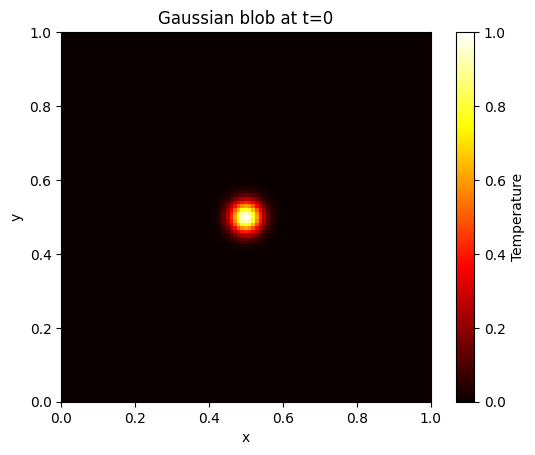

In [6]:
plt.imshow(T, extent=[0, 1, 0, 1], origin='lower', cmap='hot')
plt.colorbar(label='Temperature')
plt.title("Gaussian blob at t=0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [7]:
all_values = np.zeros((nt+1, N+1, N+1))
all_values[0] = T 

In [8]:
T.shape

(101, 101)

In [9]:
T_n = np.zeros((102,102))
T_n[:101,:101] = T
T_new_n = np.zeros((102,102))

In [10]:
T_n.shape

(102, 102)

In [11]:
T_new_n.shape

(102, 102)

In [12]:
coeff1 = alpha*dt/h**2
coeff2 = dt*((alpha/h**2)+(v/h))

In [13]:
for n in range(1, nt+1):
    for i in range(1, N+1):
        for j in range(1, N+1):
            T_new_n[i, j] = (1-stab_par)*T_n[i, j] + (coeff1)*T_n[i+1, j] + (coeff2)*T_n[i-1, j] + (coeff1)*T_n[i, j+1] + (coeff2)*T_n[i, j-1]
    T_new_n[0, :] = T_new_n[N,:]
    T_new_n[-1, :] = T_new_n[1,:]
    T_new_n[:, 0] = T_new_n[:, N]
    T_new_n[:, -1] = T_new_n[:, 1]
    T_n[:,:] = T_new_n[:,:]
    all_values[n] = T_n[:N+1, :N+1] 


In [14]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
cax = ax.imshow(all_values[0], extent=[0, L, 0, L], origin='lower', cmap='hot', vmin=0, vmax=0.2)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(frame):
    cax.set_array(all_values[frame])
    ax.set_title(f'2D Heat Diffusion at t = {frame*dt:.2f} s')
    return [cax]

interval_steps = 10
ani = FuncAnimation(fig, animate, frames=range(0, nt+1, interval_steps),
                              interval=100, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())